In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **EDA**

In [ ]:
BASE_PATH = "drive/MyDrive/Courses/DeepLearning/Project/"

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]
data = pd.read_csv(f'{BASE_PATH}NSL-KDD/KDDTrain+.txt',header=None, names=col_names)

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
data.label.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [ ]:
# descriptive statistics of dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# number of attack labels
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [ ]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
change_label(data)

In [ ]:
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

Data Normilazation

In [ ]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
numeric_col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [ ]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


One Hot Encoding

In [ ]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Data set for Binary Classification

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [ ]:
# enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

In [ ]:
# dataset with binary labels and label encoded column
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [ ]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="")
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal


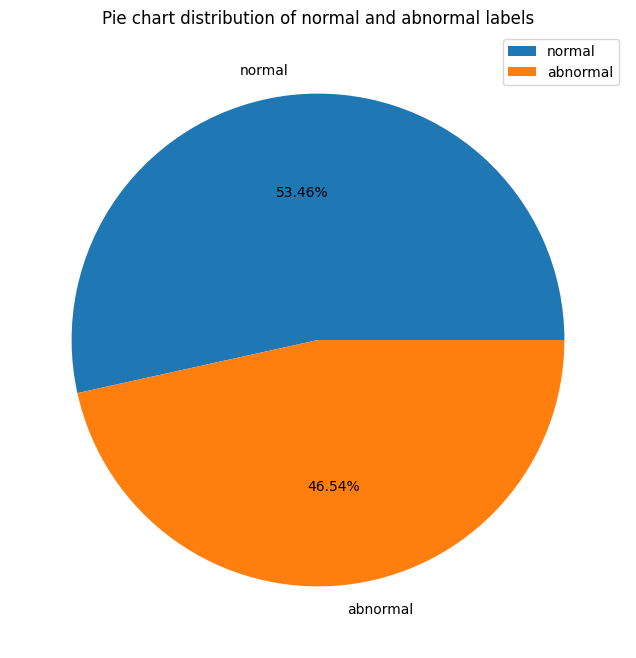

In [ ]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.savefig(f'{BASE_PATH}plots/Pie_chart_binary.png')
plt.show()

Multi Class Classification

In [ ]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [ ]:
le2.classes_

array(['Dos', 'Probe', 'R2L', 'U2R', 'normal'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [ ]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="")
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,0,0,0,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos


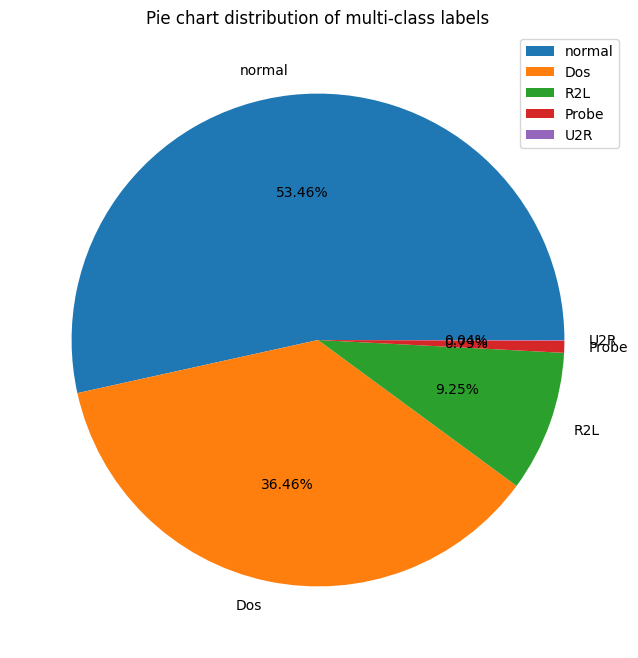

In [ ]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig(f'{BASE_PATH}plots/Pie_chart_multi.png')
plt.show()

Feature Extraction

In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

<ipython-input-35-1e82c1581057>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = bin_data['intrusion']


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [ ]:
# saving final dataset to disk
bin_data.to_csv(f"{BASE_PATH}bin_data.csv")
# final dataset for binary classification
bin_data

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,abnormal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,abnormal
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,abnormal


In [ ]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

<ipython-input-40-090abe360f20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [ ]:
# saving final dataset to disk
multi_data.to_csv(f'{BASE_PATH}multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,Dos


In [ ]:
multi_data.shape

(125973, 100)

In [ ]:
bin_data.shape

(125973, 97)

# **Multi-Layer Perceptron (MLP)**

Binary Classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import time

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()

        self.layer1 = nn.Linear(input_dim, 50)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(50, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

def initialize_parameters(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        nn.init.constant_(m.bias.data, 0)

def calculate_accuracy(y_pred, y):
    predictions = y_pred > 0.5
    correct = predictions.eq(y.view_as(predictions)).sum()
    acc = correct.float() / y.shape[0]
    return acc

def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for (x, y) in iterator:
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y.float())
        acc = calculate_accuracy(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for (x, y) in iterator:
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            loss = criterion(y_pred, y.float())
            acc = calculate_accuracy(y_pred, y)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute
# Create a PyTorch dataset
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)
dataset = TensorDataset(X_tensor, Y_tensor)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, Y_tensor, test_size=0.25, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_iterator = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_iterator = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model
input_dim = 93
model = MLP(input_dim).to(device)

model.apply(initialize_parameters)


optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification

model = model.to(device)
criterion = criterion.to(device)

# Training loop
EPOCHS = 25
best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    print(f'Running Epoch ----------> {epoch}')
    start_time = time.monotonic()

    training_loss, training_acc = train(model, train_iterator, optimizer, criterion, device)

    validation_loss, validation_acc = evaluate(model, test_iterator, criterion, device)

    # Check for the best model
    if validation_loss < best_valid_loss:
        best_valid_loss = validation_loss
        torch.save(model.state_dict(), 'best_model.pt')

    end_time = time.monotonic()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # Print statistics
    print(f'Run Time: {epoch_mins}m {epoch_secs}s')
    print(f'Training Loss: {training_loss} Training Acc: {training_acc}')
    print(f'Testing Loss: {validation_loss} Testing Acc: {validation_acc}')


Running Epoch ----------> 0
Run Time: 0m 3s
Training Loss: 0.10444835642669237 Training Acc: 0.9666342247799594
Testing Loss: 0.07179421039948025 Testing Acc: 0.9764515720081136
Running Epoch ----------> 1
Run Time: 0m 3s
Training Loss: 0.06887161737993945 Training Acc: 0.9766524204468517
Testing Loss: 0.06585689391997505 Testing Acc: 0.9778460953346856
Running Epoch ----------> 2
Run Time: 0m 3s
Training Loss: 0.06483005577750055 Training Acc: 0.9779324644549763
Testing Loss: 0.06328302959044432 Testing Acc: 0.9778460953346856
Running Epoch ----------> 3
Run Time: 0m 4s
Training Loss: 0.06258985681961225 Training Acc: 0.9786807436271544
Testing Loss: 0.062259305551889944 Testing Acc: 0.9784165821501014
Running Epoch ----------> 4
Run Time: 0m 3s
Training Loss: 0.06105471425610938 Training Acc: 0.979371191604604
Testing Loss: 0.06270729964995722 Testing Acc: 0.9793040060851927
Running Epoch ----------> 5
Run Time: 0m 3s
Training Loss: 0.0600054748258607 Training Acc: 0.9796250846310088

Test Loss: 0.05424536858934675 | Test Accuracy: 0.9825684584178499


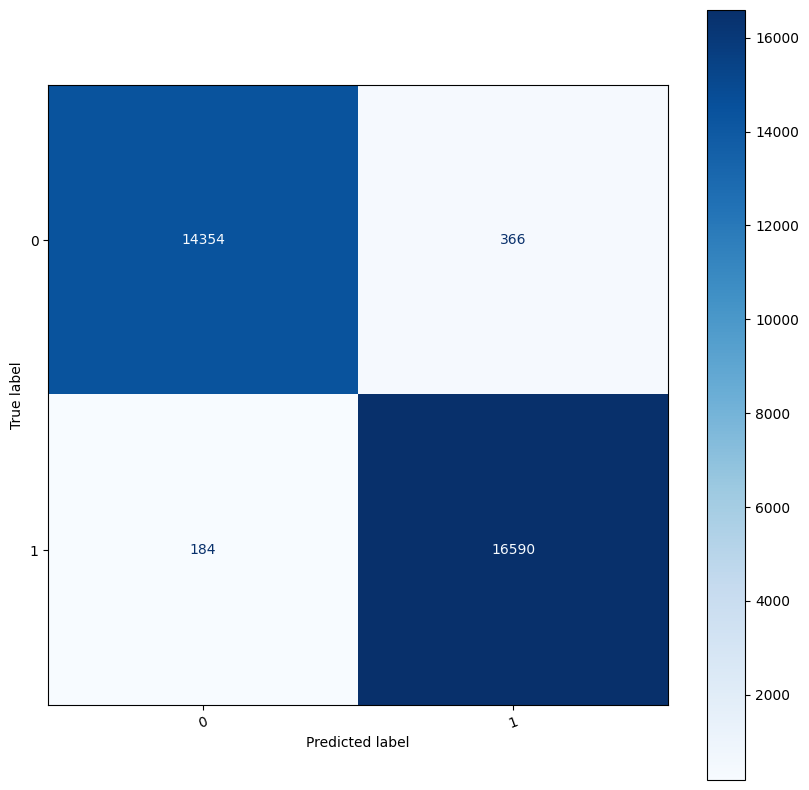

In [ ]:
# Testing
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_predictions(model, iterator, device):
    model.eval()
    labels = []
    probs = []

    with torch.no_grad():
        for (x, y) in iterator:
            x = x.to(device)
            y_pred = model(x)
            labels.append(y.cpu())
            probs.append(y_pred.cpu())

    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)
    return labels, probs

def plot_confusion_matrix(labels, pred_labels, classes):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels, labels=classes)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm_display.plot(values_format='d', cmap='Blues', ax=ax)
    plt.xticks(rotation=20)
    plt.show()


# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

# Evaluate the model on the test set
test_loss, test_acc = evaluate(model, test_iterator, criterion, device)
print(f'Test Loss: {test_loss} | Test Accuracy: {test_acc}')

# Get predictions on the test set
labels, probs = get_predictions(model, test_iterator, device)
pred_labels = (probs[:, 0] > 0.5).int()

# Plot the confusion matrix
classes = [0, 1]  # Update with your actual class labels
plot_confusion_matrix(labels, pred_labels, classes)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# After the training loop and get_predictions function
# Get predictions on the test set
labels, probs = get_predictions(model, test_iterator, device)
pred_labels = (probs[:, 0] > 0.5).int()  # Convert probabilities to binary labels

# Calculate metrics
accuracy = accuracy_score(labels, pred_labels)
precision = precision_score(labels, pred_labels)
recall = recall_score(labels, pred_labels)
f1 = f1_score(labels, pred_labels)
roc_auc = roc_auc_score(labels, probs[:, 0])

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {roc_auc}')


Accuracy: 0.9825363561313266
Precision: 0.978414720452937
Recall: 0.9890306426612615
F1-Score: 0.9836940409131337
AUC-ROC: 0.9973013703434664


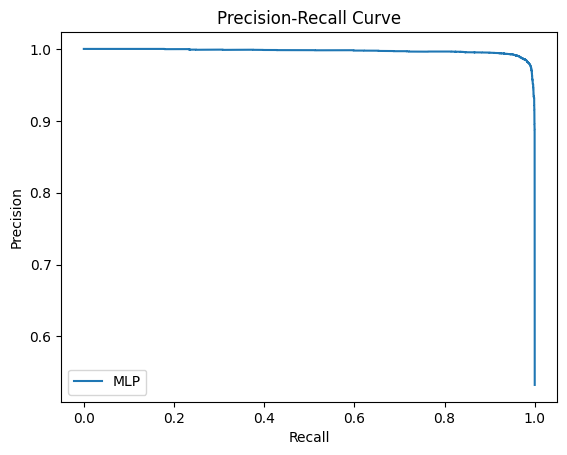

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(labels, probs[:, 0])
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='MLP').plot()
plt.title('Precision-Recall Curve')
plt.show()

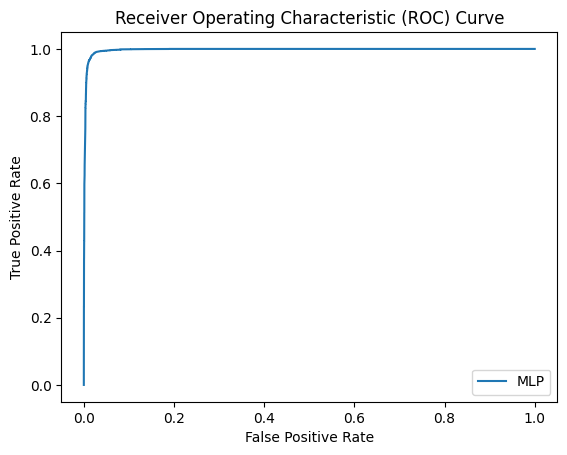

In [ ]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(labels, probs[:, 0])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='MLP').plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# **Long Short-Term Memory (LSTM)**

In [ ]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Reshape the input x to have a seq_len dimension

      # print(x.shape)
      x = x.unsqueeze(1)
      # print(x.shape)
      lstm_out, _ = self.lstm(x)
      last_output = lstm_out[:, -1]
      output = self.fc(last_output.unsqueeze(1))
      output = self.sigmoid(output)
      return output

def initialize_parameters(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        nn.init.constant_(m.bias.data, 0)

def calculate_accuracy(y_pred, y):
    predictions = y_pred > 0.5
    correct = predictions.eq(y.view_as(predictions)).sum()
    acc = correct.float() / y.shape[0]
    return acc

def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for (x, y) in iterator:
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        y_pred = model(x)
        y_pred = y_pred.squeeze(-1)
        # print("pred", y_pred.shape)
        # print("pred", y.shape)
        loss = criterion(y_pred, y.float())
        acc = calculate_accuracy(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for (x, y) in iterator:
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            y_pred = y_pred.squeeze(-1)
            loss = criterion(y_pred, y.float())
            acc = calculate_accuracy(y_pred, y)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

# Instantiate the model
input_size = 93
hidden_size = 50
output_size = 1
# lstm_model = LSTMModel(input_size, hidden_size, output_size)

In [ ]:
# # Define loss function, optimizer, and move the model to GPU if available
# criterion = nn.BCELoss()
# optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# lstm_model = lstm_model.to(device)
# criterion = criterion.to(device)
# lstm_model.apply(initialize_parameters)

In [ ]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute
# Create a PyTorch dataset
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)
dataset = TensorDataset(X_tensor, Y_tensor)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, Y_tensor, test_size=0.25, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 5000
train_iterator = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_iterator = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model
input_dim = 93

lstm_model = LSTMModel(input_size, hidden_size, output_size).to(device)

lstm_model.apply(initialize_parameters)


optimizer = optim.Adam(lstm_model.parameters(), lr=1e-3)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification

lstm_model = lstm_model.to(device)
criterion = criterion.to(device)

# Training loop
EPOCHS = 100
best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    print(f'Running Epoch ----------> {epoch}')
    start_time = time.monotonic()

    training_loss, training_acc = train(lstm_model, train_iterator, optimizer, criterion, device)

    validation_loss, validation_acc = evaluate(lstm_model, test_iterator, criterion, device)

    # Check for the best model
    if validation_loss < best_valid_loss:
        best_valid_loss = validation_loss
        torch.save(lstm_model.state_dict(), 'lstm_best_model.pt')

    end_time = time.monotonic()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # Print statistics
    print(f'Run Time: {epoch_mins}m {epoch_secs}s')
    print(f'Training Loss: {training_loss} Training Acc: {training_acc}')
    print(f'Testing Loss: {validation_loss} Testing Acc: {validation_acc}')

Running Epoch ----------> 0
Run Time: 0m 3s
Training Loss: 0.5731909463280126 Training Acc: 0.8811013792690477
Testing Loss: 0.4871299607413156 Testing Acc: 0.8935235568455288
Running Epoch ----------> 1
Run Time: 0m 4s
Training Loss: 0.42433463899712814 Training Acc: 0.8975584381505063
Testing Loss: 0.3647662103176117 Testing Acc: 0.8961159246308463
Running Epoch ----------> 2
Run Time: 0m 2s
Training Loss: 0.32307028299883794 Training Acc: 0.9017427626409029
Testing Loss: 0.2852594256401062 Testing Acc: 0.9024050831794739
Running Epoch ----------> 3
Run Time: 0m 2s
Training Loss: 0.25855331907146856 Training Acc: 0.916729842361651
Testing Loss: 0.23495787169252122 Testing Acc: 0.9181045719555446
Running Epoch ----------> 4
Run Time: 0m 2s
Training Loss: 0.21703963530691048 Training Acc: 0.9259242289944699
Testing Loss: 0.2013633804661887 Testing Acc: 0.9350303326334272
Running Epoch ----------> 5
Run Time: 0m 2s
Training Loss: 0.1886510558818516 Training Acc: 0.94294652185942
Testing

KeyboardInterrupt: ignored

In [ ]:
# Testing
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_predictions(model, iterator, device):
    model.eval()
    labels = []
    probs = []

    with torch.no_grad():
        for (x, y) in iterator:
            x = x.to(device)
            y_pred = model(x)
            labels.append(y.cpu())
            probs.append(y_pred.cpu())

    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)
    return labels, probs

def plot_confusion_matrix(labels, pred_labels, classes):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels, labels=classes)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm_display.plot(values_format='d', cmap='Blues', ax=ax)
    plt.xticks(rotation=20)
    plt.show()


# Load the best model
lstm_model.load_state_dict(torch.load('lstm_best_model.pt'))

# Evaluate the model on the test set
test_loss, test_acc = evaluate(lstm_model, test_iterator, criterion, device)
print(f'Test Loss: {test_loss} | Test Accuracy: {test_acc}')

# Get predictions on the test set
labels, probs = get_predictions(lstm_model, test_iterator, device)
pred_labels = (probs[:, 0] > 0.5).int()

# Plot the confusion matrix
classes = [0, 1]  # Update with your actual class labels
plot_confusion_matrix(labels, pred_labels, classes)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# After the training loop and get_predictions function
# Get predictions on the test set
labels, probs = get_predictions(model, test_iterator, device)
pred_labels = (probs[:, 0] > 0.5).int()  # Convert probabilities to binary labels

# Calculate metrics
accuracy = accuracy_score(labels, pred_labels)
precision = precision_score(labels, pred_labels)
recall = recall_score(labels, pred_labels)
f1 = f1_score(labels, pred_labels)
roc_auc = roc_auc_score(labels, probs[:, 0])

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {roc_auc}')


In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(labels, probs[:, 0])
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='MLP').plot()
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(labels, probs[:, 0])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='MLP').plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# **Bi Directional GAN**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.functional import sigmoid, softmax
from tqdm import tqdm
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torchsummary import summary


In [ ]:
# Define model hyperparameters
# import torch.optim as optim
# optimizer = optim.Adam(0.001)
instance_shape = 93
latent_dim = 10
# Move models to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Build the encoder model
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim),
            nn.ReLU()
        )
        # self.model.apply(initializer)

    def forward(self, x):
        return self.model(x)

encoder = Encoder(instance_shape, latent_dim)
encoder = encoder.to(device)
print(encoder)

# Build the generator model
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

generator = Generator(latent_dim, instance_shape)
generator = generator.to(device)
print(generator)

# Build the discriminator model
class Discriminator(nn.Module):
    def __init__(self, latent_dim, input_dim, output_dim):
        super(Discriminator, self).__init__()
        self.fc = nn.Linear(latent_dim + input_dim, 32)
        self.out = nn.Linear(32, output_dim)

    def forward(self, z, img):
        d_in = torch.cat((z, img), dim=1)
        model = nn.LeakyReLU(0.2)(self.fc(d_in))
        validity = torch.sigmoid(self.out(model))
        return validity

discriminator = Discriminator(latent_dim, instance_shape, 1)
discriminator = discriminator.to(device)
print(discriminator)


Encoder(
  (model): Sequential(
    (0): Linear(in_features=93, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=10, bias=True)
    (3): ReLU()
  )
)
Generator(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=93, bias=True)
    (3): Sigmoid()
  )
)
Discriminator(
  (fc): Linear(in_features=103, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
# Define loss functions and optimizers
adv_loss = nn.BCELoss()  # Binary cross-entropy loss for adversarial training

optimizer_enc = optim.Adam(encoder.parameters(), lr=0.001)
optimizer_gen = optim.Adam(generator.parameters(), lr=0.001)
optimizer_disc = optim.Adam(discriminator.parameters(), lr=0.001)

# Training loop
num_epochs = 1000  # Adjust as needed
batch_size = 64  # Adjust as needed

valid = torch.zeros(batch_size, 1).to(device)
fake = torch.ones(batch_size, 1).to(device)
sample_interval = 10

In [ ]:
bin_data[bin_data.normal==1]

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
12,-0.708312,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,0.933558,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125965,-0.725778,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,-1.026654,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125967,-0.708312,-0.430596,0.101949,0.102404,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal


In [ ]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import time

bin_data_normal = bin_data[bin_data.normal==1]
X = bin_data_normal.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data_normal[['intrusion']].values # target attribute
# Create a PyTorch dataset
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)
dataset = TensorDataset(X_tensor, Y_tensor)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, Y_tensor, test_size=0.25, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# n_noise = 64


train_losses = []
train_accs = []
val_losses = []
val_accs = []
gen_loss = []
disc_loss = []
enc_loss = []
disc_acc = []
for epoch in range(num_epochs):
  # Set the models to train mode
    encoder.train()
    generator.train()

    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    train_iter = iter(train_loader)
    real_data, labels = next(train_iter)
    optimizer_disc.zero_grad()
    discriminator.train()
    real_data, labels = real_data.to(device), labels.to(device)

    # Discriminator

    # Fake
    noise = torch.randn(batch_size, latent_dim).to(device)
    fake_data = generator(noise)
    disc_outputs_fake = discriminator(fake_data, noise)
    loss_disc_fake = adv_loss(disc_outputs_fake, torch.zeros_like(disc_outputs_fake))
    loss_disc_fake.backward()
    disc_acc_fake = (disc_outputs_fake < 0.5).float().mean().item() * 100
    # Real
    real_latent = encoder(real_data)
    disc_outputs_real = discriminator(real_data, real_latent)
    loss_disc_real = adv_loss(disc_outputs_real, torch.ones_like(disc_outputs_real))
    loss_disc_real.backward()
    disc_acc_real = (disc_outputs_real >= 0.5).float().mean().item() * 100


    # Average the two losses
    loss_disc = 0.5*(loss_disc_real + loss_disc_fake)
    acc_disc = 0.5 * (disc_acc_fake + disc_acc_real)
    # loss_disc.backward()
    optimizer_disc.step()
    discriminator.trainable = False
    optimizer_enc.zero_grad()
    optimizer_gen.zero_grad()
    k = 5
    for _ in range(k):
      optimizer_enc.step()
      optimizer_gen.step()

      # Train Generator
      real_latent = encoder(real_data)
      noise = torch.randn(batch_size, latent_dim).to(device)
      fake_data = generator(noise)

      disc_outputs_fake = discriminator(fake_data, noise)
      loss_gen = adv_loss(disc_outputs_fake, torch.ones_like(disc_outputs_fake))

      disc_outputs_real = discriminator(real_data, real_latent)
      loss_enc = adv_loss(disc_outputs_real, torch.zeros_like(disc_outputs_real))

      # loss_gen = -loss_gen
      # loss_enc = -loss_enc
      # loss_enc_gen = loss_gen + loss_enc
      loss_gen.backward()
      loss_enc.backward()
      # loss_enc_gen.backward()
      optimizer_enc.step()
      optimizer_gen.step()
    gen_loss.append(loss_gen.cpu())
    disc_loss.append(loss_disc.cpu())
    enc_loss.append(loss_enc.cpu())
    disc_acc.append(acc_disc)
    print(f"Epoch {epoch}/{num_epochs} Discriminator Loss {loss_disc} Discriminator Accuracy {acc_disc}, Generator Loss {loss_gen}, Encoder Loss {loss_enc}")

Epoch 0/1000 Discriminator Loss 0.6982037425041199 Discriminator Accuracy 62.5, Generator Loss 0.6801975965499878, Encoder Loss 0.7217223644256592
Epoch 1/1000 Discriminator Loss 0.687691867351532 Discriminator Accuracy 65.625, Generator Loss 0.7079654932022095, Encoder Loss 0.7293265461921692
Epoch 2/1000 Discriminator Loss 0.6686460375785828 Discriminator Accuracy 78.90625, Generator Loss 0.7201577425003052, Encoder Loss 0.7322226762771606
Epoch 3/1000 Discriminator Loss 0.6538078784942627 Discriminator Accuracy 89.0625, Generator Loss 0.7452611923217773, Encoder Loss 0.7356865406036377
Epoch 4/1000 Discriminator Loss 0.6539226770401001 Discriminator Accuracy 87.5, Generator Loss 0.7604646682739258, Encoder Loss 0.7370368838310242
Epoch 5/1000 Discriminator Loss 0.6502807140350342 Discriminator Accuracy 89.0625, Generator Loss 0.7682837247848511, Encoder Loss 0.7389919757843018
Epoch 6/1000 Discriminator Loss 0.6444140076637268 Discriminator Accuracy 90.625, Generator Loss 0.76169192

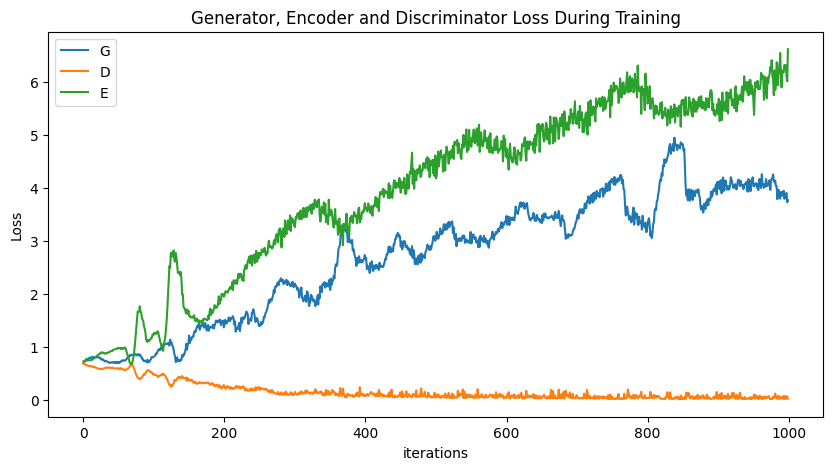

In [ ]:
%matplotlib inline
D_losses = [i.detach().numpy() for i in disc_loss]
G_losses = [i.detach().numpy() for i in gen_loss]
E_losses = [i.detach().numpy() for i in enc_loss]
plt.figure(figsize=(10,5))
plt.title("Generator, Encoder and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.plot(E_losses,label="E")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()

TEST NORMAL

In [ ]:
test_iter = iter(test_loader)
real_data, labels = next(test_iter)
real_data, labels = real_data.to(device), labels.to(device)
real_latent = encoder(real_data)
disc_outputs_real = discriminator(real_data, real_latent)

In [ ]:
disc_acc_real = (disc_outputs_real >= 0.5).float().mean().item() * 100
disc_acc_real

98.4375

TEST ABNORMAL

In [ ]:
bin_data_abnormal = bin_data[bin_data.normal==0]
X_ab = bin_data_abnormal.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y_ab = bin_data_abnormal[['intrusion']].values # target attribute
# Create a PyTorch dataset
X_ab_tensor = torch.tensor(X_ab, dtype=torch.float32)
Y_ab_tensor = torch.tensor(Y_ab, dtype=torch.float32)

test_ab_dataset = TensorDataset(X_ab_tensor, Y_ab_tensor)
test_ab_loader = DataLoader(test_ab_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
test_iter = iter(test_ab_loader)
ab_data, labels = next(test_iter)
ab_data, labels = ab_data.to(device), labels.to(device)
ab_latent = encoder(ab_data)
disc_outputs_ab = discriminator(ab_data, ab_latent)
disc_acc_ab = (disc_outputs_ab < 0.5).float().mean().item() * 100
disc_acc_ab

75.0

In [ ]:
(disc_outputs_ab < 0.5).float().mean()

tensor(0.6875, device='cuda:0')